In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [9]:
df = pd.read_csv("user_behavior_dataset.csv")

In [10]:
df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [11]:
#Checking for missing values
df.isnull().sum()

User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64

In [12]:
df = df.drop('User ID',axis=1)

In [14]:
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

df.head()

,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,0,0,393,6.4,1872,67,1122,40,1,4
1,1,0,268,4.7,1331,42,944,47,0,3
2,3,0,154,4.0,761,32,322,42,1,2
3,0,0,239,4.8,1676,56,871,20,1,3
4,4,1,187,4.3,1367,58,988,31,0,3


In [16]:
#Splitting the dataset
X = df.drop('User Behavior Class',axis=1)
y = df['User Behavior Class']

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape)

(560, 9) (140, 9)


In [18]:
#Feature Scaling
s = StandardScaler()
X_train_scaled = s.fit_transform(X_train)
X_test_scaled = s.transform(X_test)

In [20]:
#Train the model
kernels = ['linear','poly','rbf']
results = {}

for kernel in kernels:
    model = SVC(kernel=kernel,C=1,random_state=42)
    model.fit(X_train_scaled,y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test,y_pred)
    results[kernel] = acc

    class_names = [f"User Behaivour Class {i}" for i in sorted(y.unique())]

    print("Accuracy for ",kernel," is: ",acc)
    print(classification_report(y_test,y_pred,target_names=class_names))
    print(confusion_matrix(y_test,y_pred))
    

Accuracy for  linear  is:  1.0
                        precision    recall  f1-score   support

User Behaivour Class 1       1.00      1.00      1.00        27
User Behaivour Class 2       1.00      1.00      1.00        29
User Behaivour Class 3       1.00      1.00      1.00        34
User Behaivour Class 4       1.00      1.00      1.00        27
User Behaivour Class 5       1.00      1.00      1.00        23

              accuracy                           1.00       140
             macro avg       1.00      1.00      1.00       140
          weighted avg       1.00      1.00      1.00       140

[[27  0  0  0  0]
 [ 0 29  0  0  0]
 [ 0  0 34  0  0]
 [ 0  0  0 27  0]
 [ 0  0  0  0 23]]
Accuracy for  poly  is:  1.0
                        precision    recall  f1-score   support

User Behaivour Class 1       1.00      1.00      1.00        27
User Behaivour Class 2       1.00      1.00      1.00        29
User Behaivour Class 3       1.00      1.00      1.00        34
User Behaivou

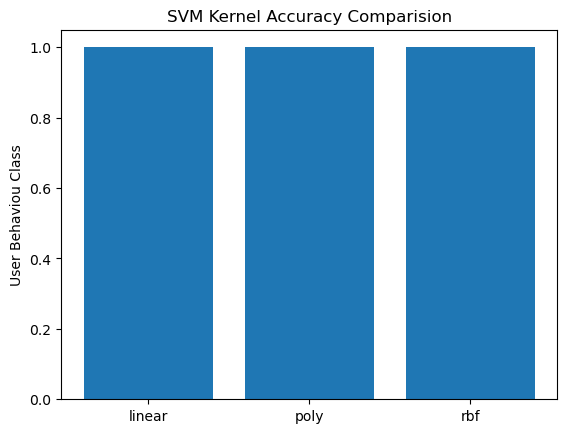

In [21]:
plt.bar(results.keys(),results.values())
plt.title('SVM Kernel Accuracy Comparision')
plt.ylabel('User Behaviou Class')
plt.show()
plt.show('svm_kernel_3.png')